In [96]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [97]:
df = pd.read_csv('netflix1.csv')

In [98]:
df.sample(5)

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
8177,s5445,TV Show,Crashing,Not Given,United Kingdom,6/2/2017,2016,TV-MA,1 Season,"British TV Shows, International TV Shows, Roma..."
3028,s4116,Movie,"Ken Jeong: You Complete Me, Ho",Jon M. Chu,United States,2/14/2019,2019,TV-MA,62 min,Stand-Up Comedy
7623,s3664,TV Show,Angel Beats!,Not Given,Japan,7/15/2019,2010,TV-PG,1 Season,"Anime Series, International TV Shows"
4395,s6123,Movie,Alone in Berlin,Vincent Perez,United Kingdom,2/15/2019,2016,R,103 min,Dramas
5861,s7988,Movie,Sex and the City: The Movie,Michael Patrick King,United States,1/1/2021,2008,R,145 min,"Comedies, Dramas, Romantic Movies"


## Data preparation

In [99]:
df.isnull().sum()

show_id         0
type            0
title           0
director        0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
dtype: int64

In [100]:
df.duplicated().sum()

np.int64(0)

In [101]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8790 entries, 0 to 8789
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8790 non-null   object
 1   type          8790 non-null   object
 2   title         8790 non-null   object
 3   director      8790 non-null   object
 4   country       8790 non-null   object
 5   date_added    8790 non-null   object
 6   release_year  8790 non-null   int64 
 7   rating        8790 non-null   object
 8   duration      8790 non-null   object
 9   listed_in     8790 non-null   object
dtypes: int64(1), object(9)
memory usage: 686.8+ KB


In [102]:
df['date_added']=pd.to_datetime(df['date_added'])

In [103]:
df.rename(columns={'listed_in':"category"},inplace=True)

In [104]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8790 entries, 0 to 8789
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       8790 non-null   object        
 1   type          8790 non-null   object        
 2   title         8790 non-null   object        
 3   director      8790 non-null   object        
 4   country       8790 non-null   object        
 5   date_added    8790 non-null   datetime64[ns]
 6   release_year  8790 non-null   int64         
 7   rating        8790 non-null   object        
 8   duration      8790 non-null   object        
 9   category      8790 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(8)
memory usage: 686.8+ KB


In [105]:
df.drop(columns=['show_id'],inplace=True)

In [106]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8790 entries, 0 to 8789
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   type          8790 non-null   object        
 1   title         8790 non-null   object        
 2   director      8790 non-null   object        
 3   country       8790 non-null   object        
 4   date_added    8790 non-null   datetime64[ns]
 5   release_year  8790 non-null   int64         
 6   rating        8790 non-null   object        
 7   duration      8790 non-null   object        
 8   category      8790 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(7)
memory usage: 618.2+ KB


In [107]:
# Extract movie duration (in minutes)
df["movie_duration"] = df["duration"].str.extract(r"(\d+) min").astype(float)

# Extract number of seasons for TV Shows
df["num_seasons"] = df["duration"].str.extract(r"(\d+) Season").astype(float)


In [108]:
df.info()
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8790 entries, 0 to 8789
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   type            8790 non-null   object        
 1   title           8790 non-null   object        
 2   director        8790 non-null   object        
 3   country         8790 non-null   object        
 4   date_added      8790 non-null   datetime64[ns]
 5   release_year    8790 non-null   int64         
 6   rating          8790 non-null   object        
 7   duration        8790 non-null   object        
 8   category        8790 non-null   object        
 9   movie_duration  6126 non-null   float64       
 10  num_seasons     2664 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(7)
memory usage: 755.5+ KB


,type,title,director,country,date_added,release_year,rating,duration,category,movie_duration,num_seasons
0,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,2021-09-25,2020,PG-13,90 min,Documentaries,90.0,NaN
1,TV Show,Ganglands,Julien Leclercq,France,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",NaN,1.0
2,TV Show,Midnight Mass,Mike Flanagan,United States,2021-09-24,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",NaN,1.0
3,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,2021-09-22,2021,TV-PG,91 min,"Children & Family Movies, Comedies",91.0,NaN
4,Movie,Sankofa,Haile Gerima,United States,2021-09-24,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies",125.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...
8785,TV Show,Yunus Emre,Not Given,Turkey,2017-01-17,2016,TV-PG,2 Seasons,"International TV Shows, TV Dramas",NaN,2.0
8786,TV Show,Zak Storm,Not Given,United States,2018-09-13,2016,TV-Y7,3 Seasons,Kids' TV,NaN,3.0
8787,TV Show,Zindagi Gulzar Hai,Not Given,Pakistan,2016-12-15,2012,TV-PG,1 Season,"International TV Shows, Romantic TV Shows, TV ...",NaN,1.0
8788,TV Show,Yoko,Not Given,Pakistan,2018-06-23,2016,TV-Y,1 Season,Kids' TV,NaN,1.0


## Data Analysis

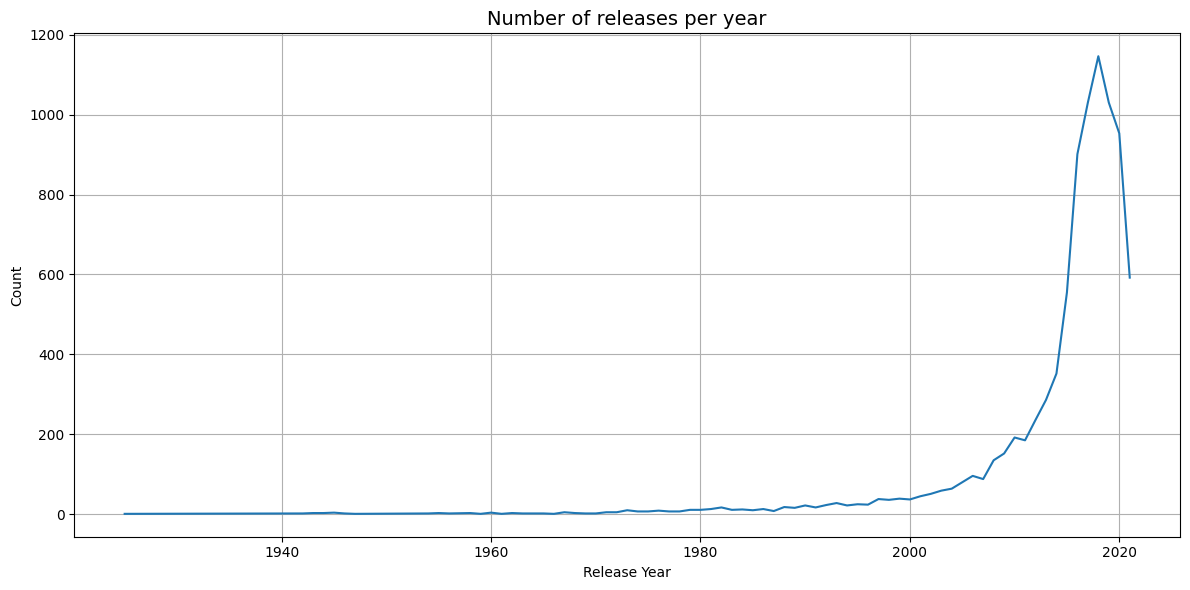

In [109]:
# Number of releases per year
plt.figure(figsize=(12,6))

release_counts=df['release_year'].value_counts().sort_index()
sns.lineplot(
    x=release_counts.index,
    y=release_counts.values
)
plt.xlabel('Release Year')
plt.ylabel('Count')
plt.title("Number of releases per year",size=14)
plt.grid(True)
plt.tight_layout()
plt.show()

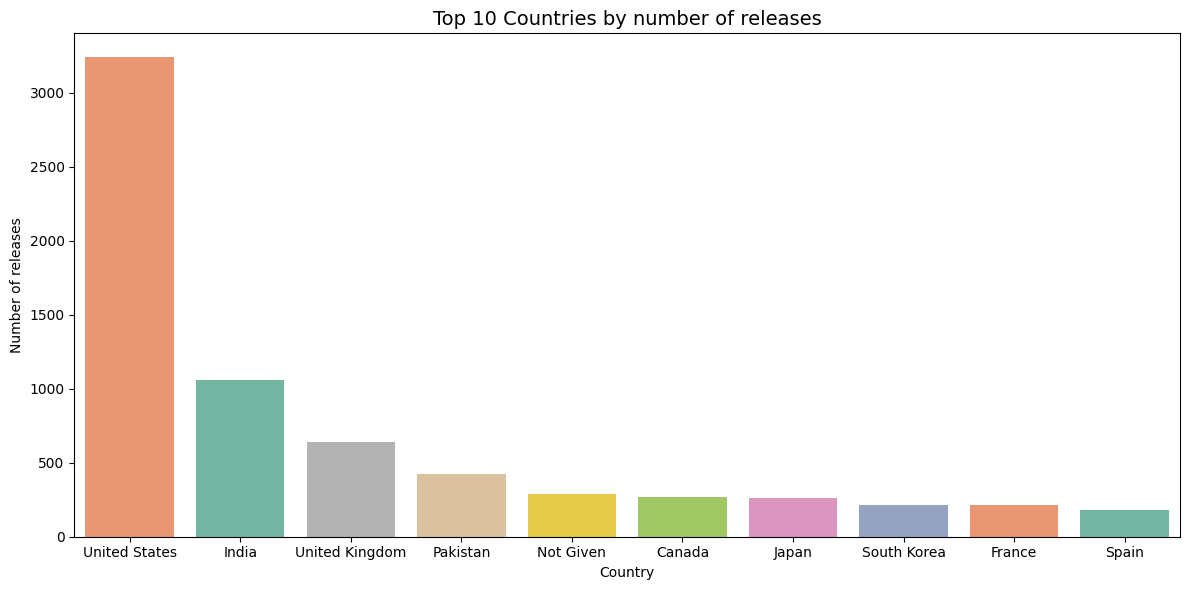

In [110]:
# Top 10 countries by number of releases

plt.figure(figsize=(12,6))
data=df['country'].value_counts().head(10)
sns.barplot(
    x=data.index,
    y=data.values,
    palette='Set2',
    hue=data.values,
    legend=False
)

plt.title('Top 10 Countries by number of releases',size=14)
plt.xlabel("Country")
plt.ylabel("Number of releases")
plt.tight_layout()
plt.show()

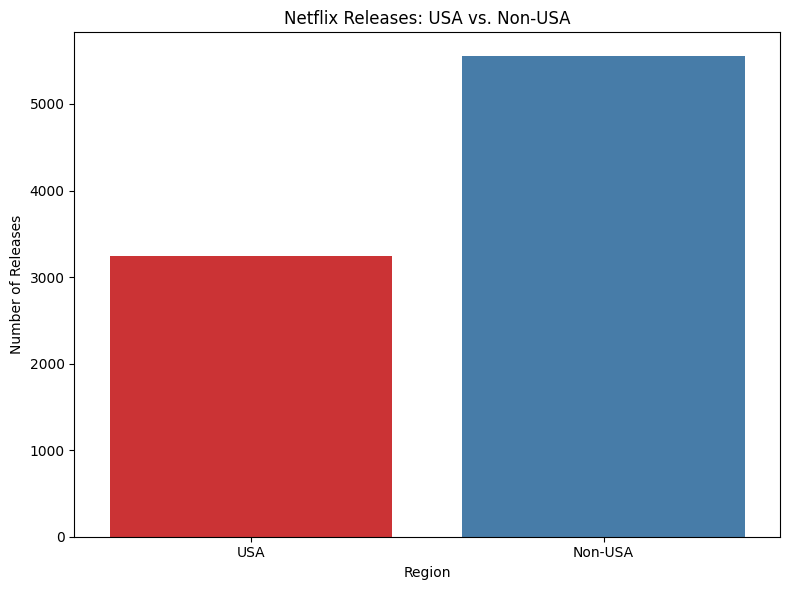

In [111]:
# Compare USA vs non USA

# Group countries into "USA" and "Non-USA"
df['country_group'] = df['country'].apply(lambda x: 'USA' if x == 'United States' else 'Non-USA')

plt.figure(figsize=(8, 6))
sns.countplot(
    data=df,
    x='country_group',
    palette='Set1',
    hue='country_group',
    legend=False
)

plt.xlabel("Region")
plt.ylabel("Number of Releases")
plt.title("Netflix Releases: USA vs. Non-USA")

plt.tight_layout()
plt.show()

USA releases are equal to more than half on non USA releases

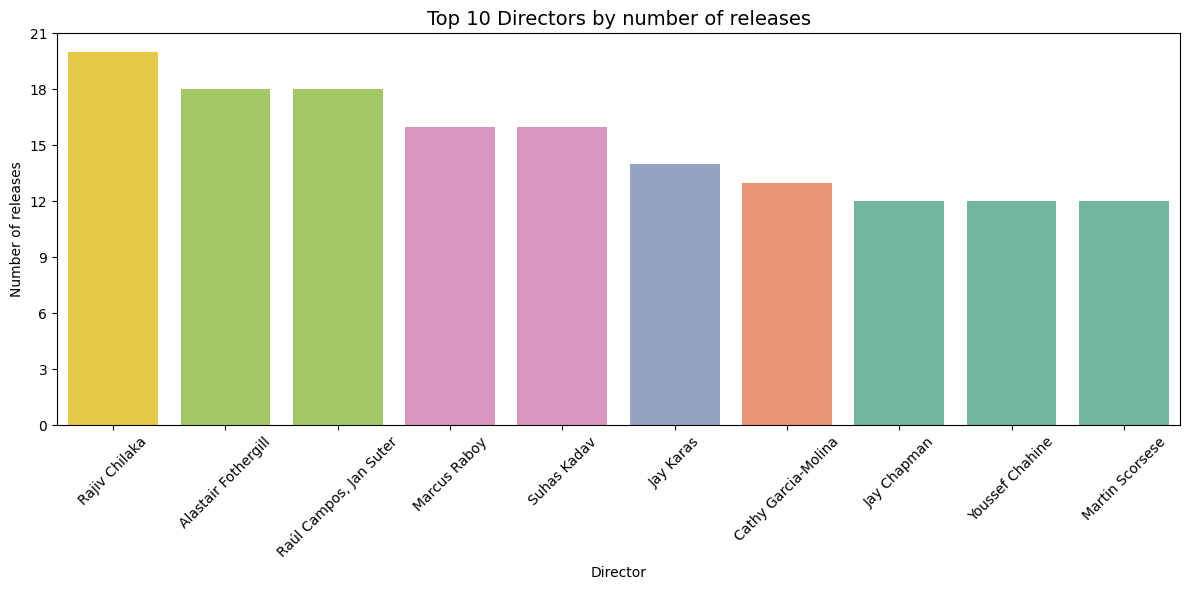

In [112]:
import matplotlib.ticker

# Top 10 directors by number of releases
plt.figure(figsize=(12,6))

# Exclude 'Not Given' and get the top 10 directors
data = df[df['director'] != 'Not Given']['director'].value_counts().head(10)

sns.barplot(
    x=data.index,
    y=data.values,
    palette='Set2',
    hue=data.values,
    legend=False
)

plt.title('Top 10 Directors by number of releases',size=14)
plt.xlabel("Director")
plt.ylabel("Number of releases")
plt.xticks(rotation=45)



plt.gca().yaxis.set_major_locator(matplotlib.ticker.MaxNLocator(integer=True))

plt.tight_layout()
plt.show()

Interestingly, the most popular director is Indian, not American

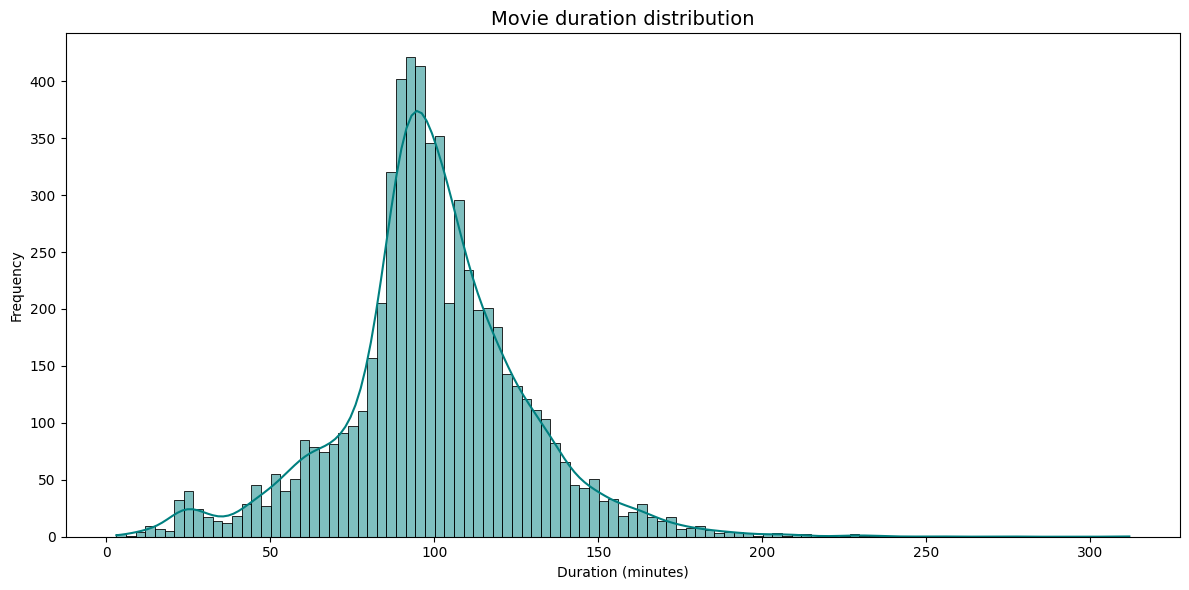

In [113]:
# Movie duration distribution
plt.figure(figsize=(12,6))
sns.histplot(
    data=df,
    x='movie_duration',
    color='teal',
    kde=True
)
plt.title("Movie duration distribution",size=14)
plt.ylabel("Frequency")
plt.xlabel("Duration (minutes)")
plt.tight_layout()
plt.show()

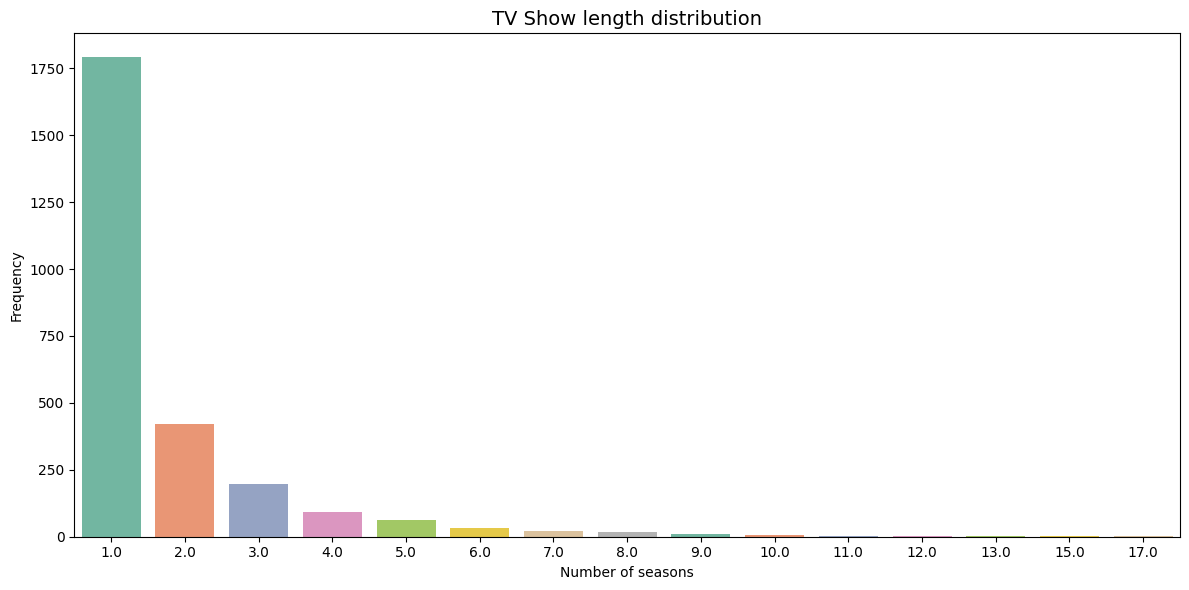

In [119]:
# TV Show length distribution
plt.figure(figsize=(12,6))
sns.countplot(
    data=df,
    x='num_seasons',
    palette='Set2',
    hue='num_seasons',
    legend=False
)
plt.title("TV Show length distribution",size=14)
plt.ylabel("Frequency")
plt.xlabel("Number of seasons")
plt.tight_layout()

plt.show()